In [186]:
## Author: Dejun Xiang
## ID: 349329
## Project: Donald Trump analytics
## Supervisor: Prof. Richard O. Sinnott
## Pre-process Weibo text (Chinese)

In [146]:
import re
import random
import jieba.posseg as psg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from snownlp import SnowNLP

In [2]:
# import Chinese stop words
s1 = [line.rstrip() for line in open(r'C:\Users\Derek\Desktop\twitter\stopwords_Chinese\哈工大停用词表.txt', 'r', encoding='UTF-8')]
s2 = [line.rstrip() for line in open(r'C:\Users\Derek\Desktop\twitter\stopwords_Chinese\中文停用词库.txt', 'r', encoding='UTF-8')]
s3 = [line.rstrip() for line in open(r'C:\Users\Derek\Desktop\twitter\stopwords_Chinese\四川大学机器智能实验室停用词库.txt', 'r', encoding='UTF-8')]
stopwords = s1+s2+s3

In [3]:
raw_data = pd.read_csv(r"C:\Users\Derek\Desktop\twitter\data\weibo_until 13-05-2018.csv", encoding = "UTF-8")

In [4]:
raw_data.columns = ["id", "user_name","weibo","meiyong","dates","likes","num_retweets","num_comment","comment","user_ctt","time_cott"]

In [5]:
# delete the useless columns that is not going to be used now
raw_data2 = raw_data.drop(raw_data.columns[0],axis=1)
raw_data2 = raw_data2.drop(raw_data2.columns[2],axis=1)

In [7]:
# cover the weibo content with its reply except the first which is itself
length = len(raw_data2)
dict = {}
for i in range(0,length):
    if raw_data2.loc[i,"weibo"] in dict:
        raw_data2.loc[i,"weibo"] = raw_data2.loc[i,"comment"]
        raw_data2.loc[i,"dates"] = raw_data2.loc[i,"time_cott"]
        raw_data2.loc[i,"user_name"] = raw_data2.loc[i,"user_ctt"]
    else:
        dict[raw_data2.loc[i,"weibo"]] = 1

In [8]:
# delete the useless columns for this case
raw_data3 = raw_data2.drop(raw_data2.columns[3:],axis=1)

In [11]:
# remove empty cells
raw_data4 = raw_data3[raw_data3["weibo"].notnull()]
# rebuild the index from 0 to then (length-1)
raw_data4.index = range(len(raw_data4))

In [37]:
# delete the rows that has chinese character in column 'dates', which is 60 totally
raw_data4_copy = raw_data4.copy()
raw_data5 = raw_data4_copy[raw_data4_copy['dates'].str.contains('[\u4E00-\u9FD5]') == False]

In [41]:
# convert the data type of date from object to datetime64
raw_data5_copy = raw_data5.copy()
raw_data5['dates'] = pd.to_datetime(raw_data5_copy['dates'])

C:\Users\Derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
raw_data5.index = range(len(raw_data5))
# remove un-related symbol
rm_reply_symbol(raw_data5)

In [55]:
# see is there any empty cell
raw_data5.weibo.isnull().sum()

1

In [56]:
# remove empty cells
raw_data6 = raw_data5[raw_data5["weibo"].notnull()]
# rebuild the index from 0 to then (length-1)
raw_data6.index = range(len(raw_data6))

In [58]:
# check if there is any null in the cell "weibo"
raw_data6.weibo.isnull().sum()

0

In [60]:
raw_data6_copy = raw_data6.copy()
for i in range(len(raw_data6)):
    tweet = raw_data6_copy.weibo.loc[i]
    clean_tweet = clean_text(tweet)
    raw_data6.weibo.loc[i] = clean_tweet

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Derek\AppData\Local\Temp\jieba.cache
Loading model cost 0.724 seconds.
Prefix dict has been built succesfully.
C:\Users\Derek\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [73]:
# check if there is any value is ""
raw_data7 = raw_data6[raw_data6.weibo != ""]
raw_data7.index = range(len(raw_data7))

In [81]:
len(raw_data7)

299046

In [ ]:
data_copy1 = raw_data7.copy()
# store [classification]
pol_class = []
for i in range(len(raw_data7)):
    weibo = data_copy1.loc[i,'weibo']
    result = classify(weibo)
    pol_class.append(result)
    if i % 1000 == 0:
        print(i)

In [85]:
raw_data7['sentiment'] = np.array(pol_class)

C:\Users\Derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
raw_data7_sorted = raw_data7.sort_values(by = 'dates')
raw_data7_sorted.index = range(len(raw_data7_sorted))

In [170]:
#get rid of some data out of the period we want
raw_data8 = raw_data7_sorted[:-1781]

In [183]:
# save the cleaned data
raw_data8.to_csv(r"C:\Users\Derek\Desktop\twitter\data\cleaned_weibo_Chinese.csv")

In [171]:
raw_data8['date_only'] = raw_data8.dates.dt.date

C:\Users\Derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


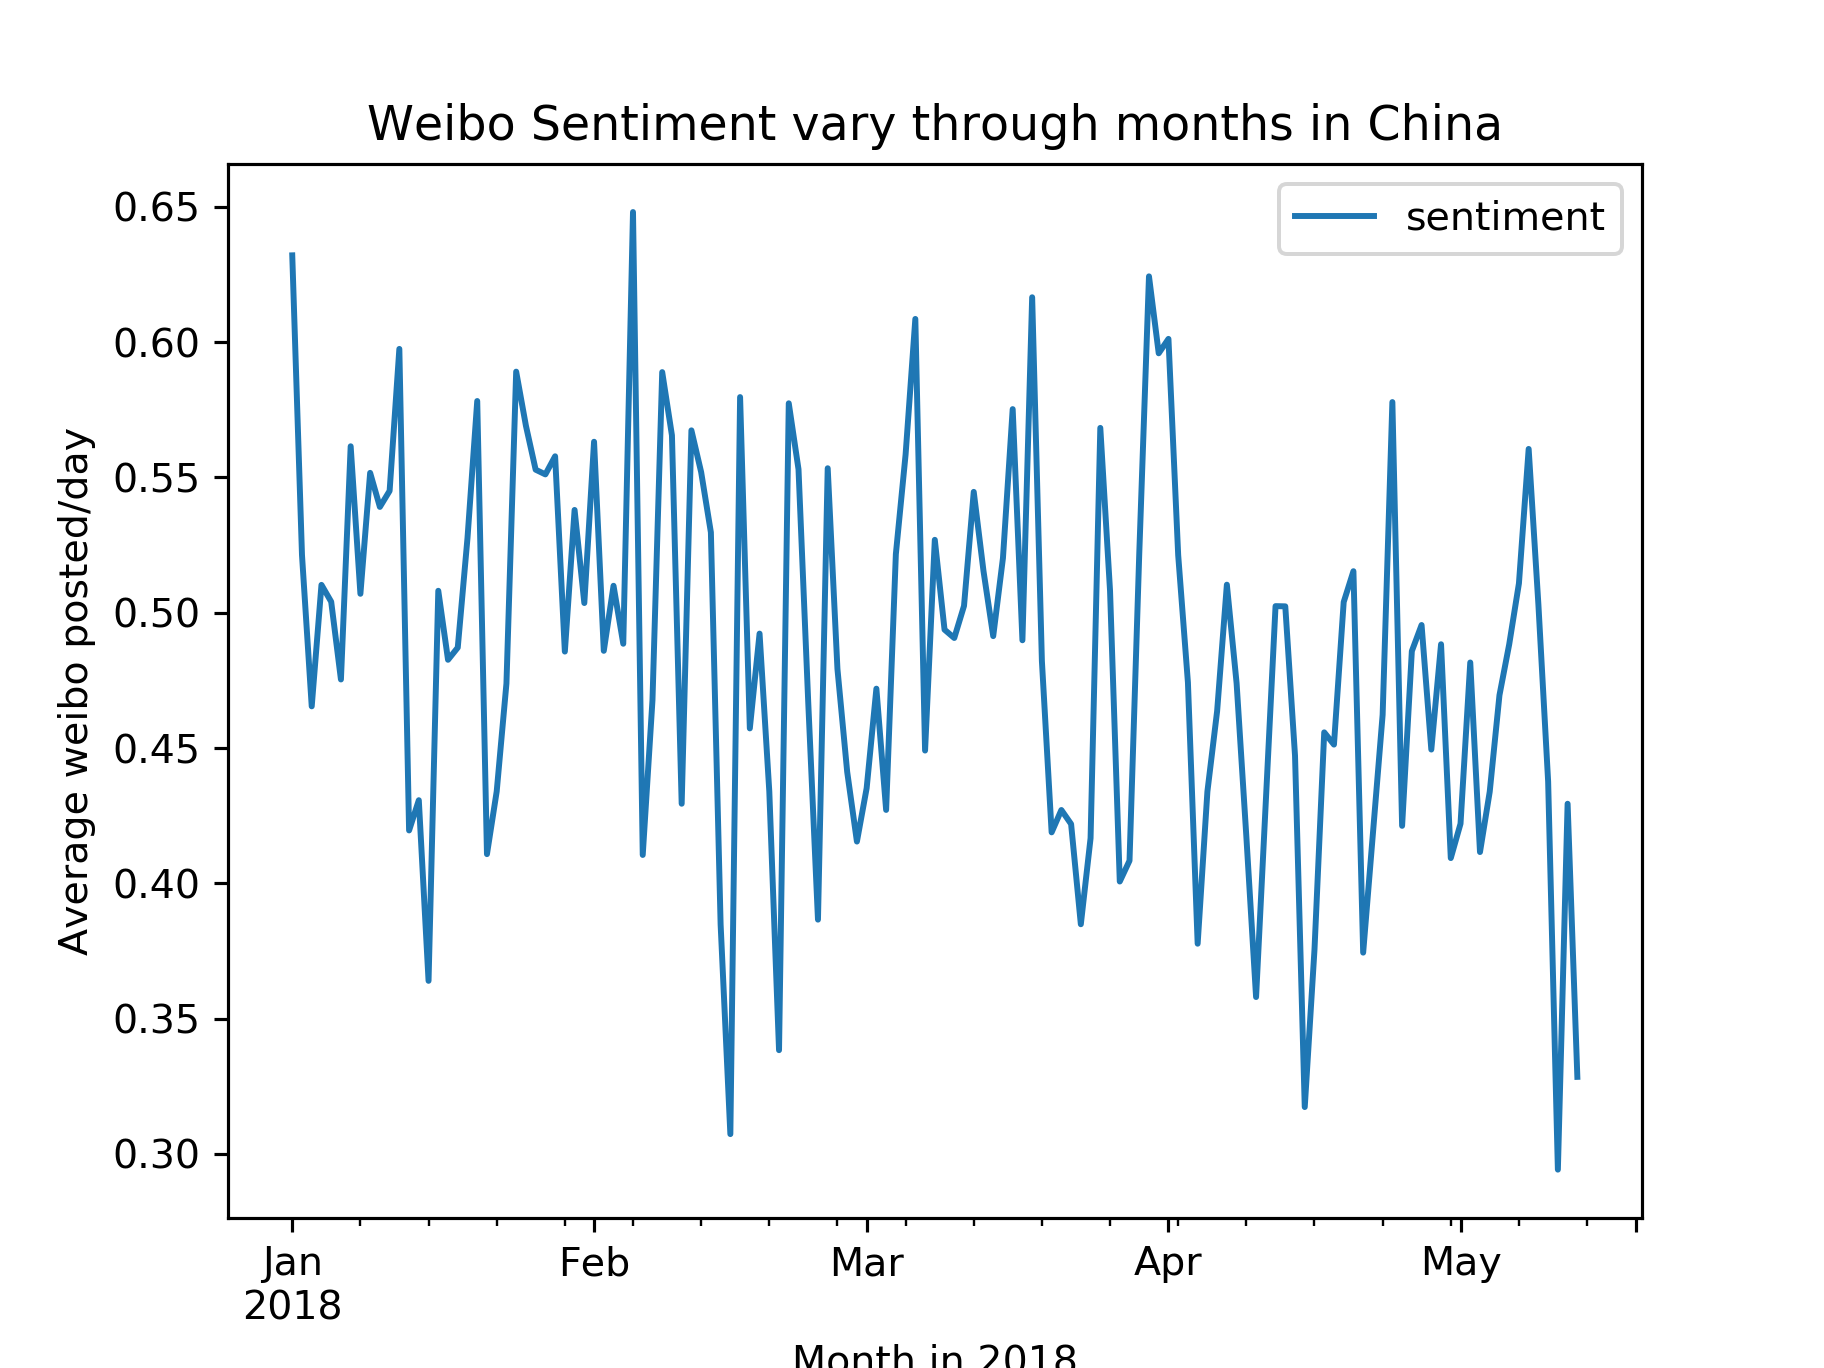

Text(0.5, 1.0, 'Weibo Sentiment vary through months in China')

In [185]:
%matplotlib notebook
d2 = raw_data8.groupby('date_only').mean()
# d2.plot()
myplot = d2.plot(kind='line')
myplot.set_xlabel('Month in 2018')
myplot.set_ylabel('Average weibo posted/day')
myplot.set_title('Weibo Sentiment vary through months in China')

In [173]:
raw_data8_copy = raw_data8.copy()
raw_data8['date_only'] = pd.to_datetime(raw_data8_copy['date_only'])

C:\Users\Derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [174]:
raw_data8.dtypes

user_name            object
weibo                object
dates        datetime64[ns]
sentiment             int32
date_only    datetime64[ns]
dtype: object

In [83]:
'''
Function: remove the reply symbols like 回复@美国之音:
Input:    dataframe
'''
def rm_reply_symbol(dataset):
    data_copy = dataset.copy()
    pattern = re.compile('(@.+:)|回复(@.+:)')
    length = len(dataset)
    for i in range(0,length):
        text = data_copy.loc[i,"weibo"]
        dataset.loc[i,"weibo"] = pattern.sub('',text)
        
'''
Function: delete all stuff that is not Chinese and have no
          contribution on the polarity check
Input:    raw text（string)
Output:   a cleaned text with String type
'''
def clean_text(text):
    # delete all the stuff thar is not in Chinese
    chinese_only = re.compile('[^\u4E00-\u9FD5]+').sub('',text)
    
    # remove stopwords from texts according to stopwords dictionary
    words = psg.cut(chinese_only)
    cleaned_words = []
    for word, flag in words:
        if word not in stopwords:
            cleaned_words.append(word)

    # return a string of the cleaned words
    return ' '.join(cleaned_words)


'''
Function: calculate the possibility that it is a positive text
Input:    string text
Output:   float from 0 to 1
'''
def classify(text):
    s1 = SnowNLP(text)
    s = s1.sentiments
    if s > 0.55:
        return 1
    elif s >=0.45 and s <= 0.55:
        return 0 
    else:
        return -1

In [10]:
'''
Function: reservior sampler
          sampling randomly and uniformly(can be proved by math)
          --> find the random index first, then get the rows
Input: k (int) --> the number of samples needed
       dataset (dataframe)--> the dataframe sampled from
Output: sampled dataframe
'''
def sampler(k,dataset):
    index = []
    num_rows = len(dataset)
    if k > num_rows or k <= 0:
        return "sampling size 'k' is not valid, try other 'k'"
    for i in range(0,num_rows):
        if i < k:
            index.append(i)
        else:
            random_index = random.randint(0,i)
            if random_index < k:
                index[random_index] = i
    return dataset.iloc[index]
            